In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpdaf.obj import Image

## Frist Map with Voronoi Bin

In [3]:
# To compute the elliptical radius we need that x-axis coincident with the galaxy major axis.
# So we need to rotate the pixel position
def rotate_points(x, y, ang):
    """
    Rotates points conter-clockwise by an angle ANG in degrees.
    Michele cappellari, Paranal, 10 November 2013

    """
    theta = np.radians(ang)
    xNew = x*np.cos(theta) - y*np.sin(theta)
    yNew = x*np.sin(theta) + y*np.cos(theta)

    return xNew, yNew  

In [29]:
rell_vor = [] #elliptical radii

vrms_vor = [] #list for Vrms
erms_vor = [] #list for error rms

rell_m = [] #elliptical radii

vrms_m = [] #list for Vrms
erms_m = [] #list for error rms

#Galaxy structural parameters
x0, y0 = (9, 9)
pa     = 68.0
eps    = 0.221
scale  = 0.6

In [30]:
vrms_miles  = Image("/home/carlos/Documents/GitHub/Master-Degree/ESO325/Dynamical Modelling/pPXF/Data/Test.fits")
vrms_vorbin = Image("/home/carlos/Documents/GitHub/Master-Degree/ESO325/Dynamical Modelling/pPXF/Data/Test2.fits")

In [31]:
for i in range(vrms_miles.data.data.shape[0]):       #y pixel
    for j in range(vrms_miles.data.data.shape[1]):   #x pixel
        rot_x, rot_y = rotate_points(j - x0, i - y0, 90 - pa)
        r = scale * np.sqrt(rot_x**2 + (rot_y/(1-eps))**2)
        rell_m.append(r)
        vrms_m.append(vrms_miles.data.data[i,j])
        erms_m.append(vrms_miles.var.data[i,j])

In [32]:
for i in range(vrms_vorbin.data.data.shape[0]):       #y pixel
    for j in range(vrms_vorbin.data.data.shape[1]):   #x pixel
        rot_x, rot_y = rotate_points(j - x0, i - y0, 90 - pa)
        r = scale * np.sqrt(rot_x**2 + (rot_y/(1-eps))**2)
        rell_vor.append(r)
        vrms_vor.append(vrms_vorbin.data.data[i,j])
        erms_vor.append(vrms_vorbin.var.data[i,j])

Text(0.5, 0, 'Circularized radius')

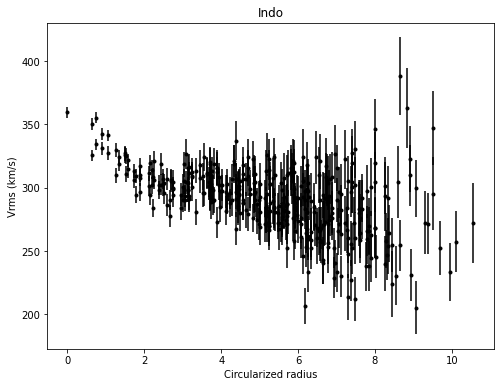

In [34]:
plt.figure(figsize=(8,6))
plt.errorbar(rell_vor,vrms_vor, yerr=erms_vor, fmt=".k", capsize=0)
plt.title("Indo")
plt.ylabel("Vrms (km/s)")
plt.xlabel("Circularized radius")

Text(0.5, 0, 'Circularized radius')

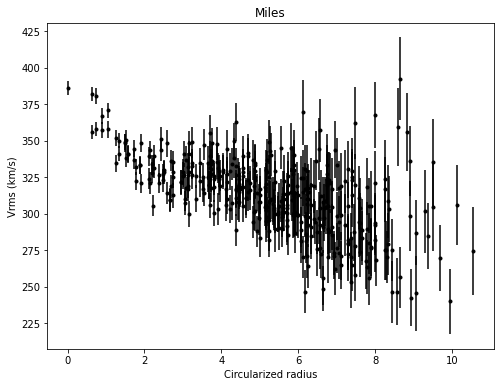

In [35]:
plt.figure(figsize=(8,6))
plt.errorbar(rell_m,vrms_m, yerr=erms_m, fmt=".k", capsize=0)
plt.title("Miles")
plt.ylabel("Vrms (km/s)")
plt.xlabel("Circularized radius")

## Both

In [36]:
vrms_vorbin2 = Image("/home/carlos/Documents/GitHub/Master-Degree/ESO325/Dynamical Modelling/pPXF/Data/Velocity Dispersion Map Second Run.fits")

rell_2 = [] #elliptical radii

vrms_2 = [] #list for Vrms
erms_2 = [] #list for error rms

#Galaxy structural parameters
x0, y0 = (9, 9)
pa     = 68.0
eps    = 0.221
scale  = 0.6

for i in range(vrms_vorbin2.data.data.shape[0]):       #y pixel
    for j in range(vrms_vorbin2.data.data.shape[1]):   #x pixel
        rot_x, rot_y = rotate_points(j - x0, i - y0, 90 - pa)
        r = scale * np.sqrt(rot_x**2 + (rot_y/(1-eps))**2)
        rell_2.append(r)
        vrms_2.append(vrms_vorbin2.data.data[i,j])
        erms_2.append(vrms_vorbin2.var.data[i,j])

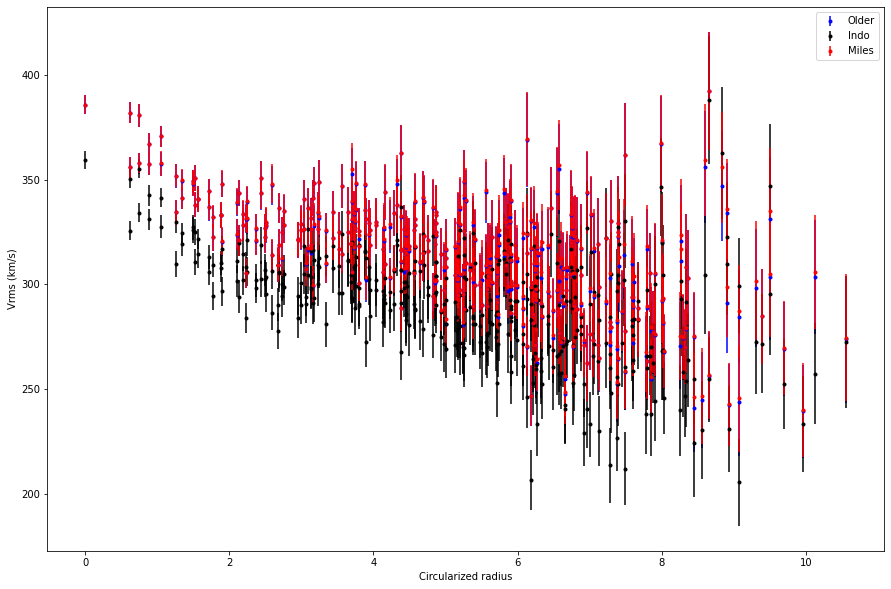

In [42]:
plt.figure(figsize=(15,10))
plt.errorbar(rell_2,vrms_2, yerr=erms_2, capsize=0, fmt=".b", label="Older")
plt.errorbar(rell_vor,vrms_vor, yerr=erms_vor, fmt=".k", capsize=0, label="Indo")
plt.errorbar(rell_m,vrms_m, yerr=erms_m, fmt=".r", capsize=0, label="Miles")

plt.ylabel("Vrms (km/s)")
plt.xlabel("Circularized radius")

plt.legend()